In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn
from imblearn.over_sampling import SMOTE
from collections import Counter

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

from sklearn.neighbors import  KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, plot_confusion_matrix, confusion_matrix
import pickle

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [4]:
data = pd.read_csv('Fertilizer Prediction.csv')
data.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [5]:
data

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea
...,...,...,...,...,...,...,...,...,...
94,25,50,32,Clayey,Pulses,24,0,19,28-28
95,30,60,27,Red,Tobacco,4,17,17,10-26-26
96,38,72,51,Loamy,Wheat,39,0,0,Urea
97,36,60,43,Sandy,Millets,15,0,41,DAP


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temparature      99 non-null     int64 
 1   Humidity         99 non-null     int64 
 2   Moisture         99 non-null     int64 
 3   Soil Type        99 non-null     object
 4   Crop Type        99 non-null     object
 5   Nitrogen         99 non-null     int64 
 6   Potassium        99 non-null     int64 
 7   Phosphorous      99 non-null     int64 
 8   Fertilizer Name  99 non-null     object
dtypes: int64(6), object(3)
memory usage: 7.1+ KB


In [7]:
l=data["Fertilizer Name"].unique()

In [8]:
l

array(['Urea', 'DAP', '14-35-14', '28-28', '17-17-17', '20-20',
       '10-26-26'], dtype=object)

In [9]:
data.shape

(99, 9)

In [10]:
data["Soil Type"].unique()

array(['Sandy', 'Loamy', 'Black', 'Red', 'Clayey'], dtype=object)

In [11]:
data["Crop Type"].unique()

array(['Maize', 'Sugarcane', 'Cotton', 'Tobacco', 'Paddy', 'Barley',
       'Wheat', 'Millets', 'Oil seeds', 'Pulses', 'Ground Nuts'],
      dtype=object)

In [12]:
data.columns

Index(['Temparature', 'Humidity ', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name'],
      dtype='object')

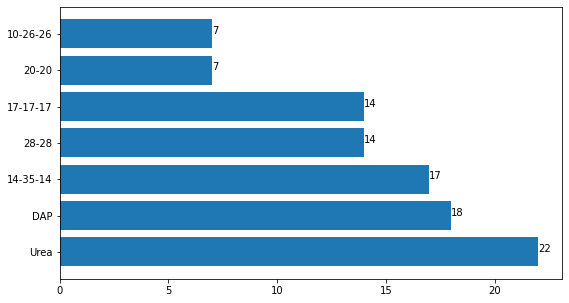

In [13]:
labels = data["Fertilizer Name"].unique()
counts = list(data["Fertilizer Name"].value_counts())

plt.figure(figsize = (9,5))
plt.barh(labels, counts)
  
for index, value in enumerate(counts):
    plt.text(value, index,
             str(value))
plt.show()


In [14]:
continuous_data_cols = ["Temparature", "Humidity ", "Moisture", "Nitrogen", "Phosphorous"]
categorical_data_cols = ["Soil Type", "Crop Type"]

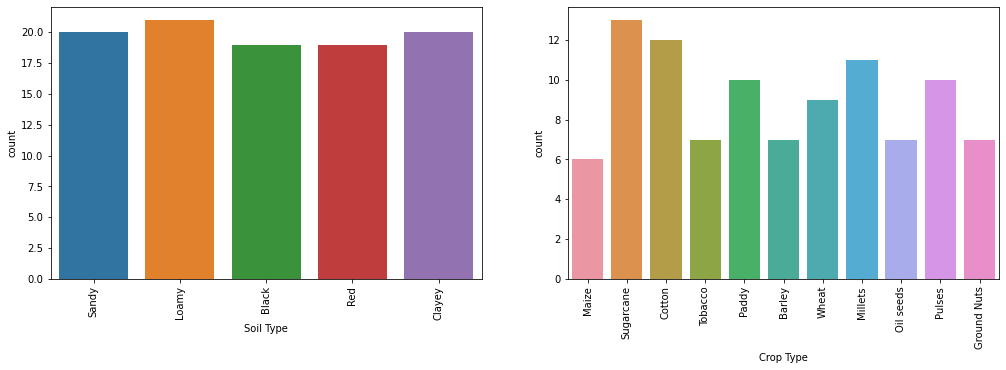

In [15]:
plt.figure(figsize=(17,5))
i = 1
for column in categorical_data_cols:
    plt.subplot(1,2,i)
    sns.countplot(data[column])
    plt.xticks(rotation = 90)
    i+=1
plt.show()

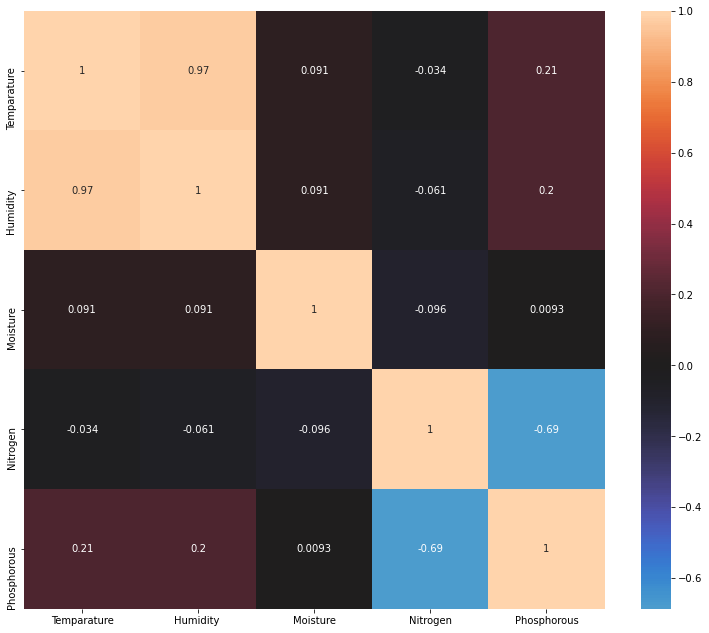

In [16]:
plt.figure(figsize = (13,11))
sns.heatmap(data[continuous_data_cols].corr(), center = 0, annot = True)
plt.show()

In [17]:
soil_type_label_encoder = LabelEncoder()
data["Soil Type"] = soil_type_label_encoder.fit_transform(data["Soil Type"])


In [18]:
crop_type_label_encoder = LabelEncoder()
data["Crop Type"] = crop_type_label_encoder.fit_transform(data["Crop Type"])

In [19]:
croptype_dict = {}
for i in range(len(data["Crop Type"].unique())):
    croptype_dict[i] = crop_type_label_encoder.inverse_transform([i])[0]
print(croptype_dict)

soiltype_dict = {}
for i in range(len(data["Soil Type"].unique())):
    soiltype_dict[i] = soil_type_label_encoder.inverse_transform([i])[0]
print(soiltype_dict)

{0: 'Barley', 1: 'Cotton', 2: 'Ground Nuts', 3: 'Maize', 4: 'Millets', 5: 'Oil seeds', 6: 'Paddy', 7: 'Pulses', 8: 'Sugarcane', 9: 'Tobacco', 10: 'Wheat'}
{0: 'Black', 1: 'Clayey', 2: 'Loamy', 3: 'Red', 4: 'Sandy'}


In [20]:
fertname_label_encoder = LabelEncoder()
data["Fertilizer Name"] = fertname_label_encoder.fit_transform(data["Fertilizer Name"])

In [21]:
fertname_dict = {}
for i in range(len(data["Fertilizer Name"].unique())):
    fertname_dict[i] = fertname_label_encoder.inverse_transform([i])[0]
print(fertname_dict)

{0: '10-26-26', 1: '14-35-14', 2: '17-17-17', 3: '20-20', 4: '28-28', 5: 'DAP', 6: 'Urea'}


In [22]:
data

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,4,3,37,0,0,6
1,29,52,45,2,8,12,0,36,5
2,34,65,62,0,1,7,9,30,1
3,32,62,34,3,9,22,0,20,4
4,28,54,46,1,6,35,0,0,6
...,...,...,...,...,...,...,...,...,...
94,25,50,32,1,7,24,0,19,4
95,30,60,27,3,9,4,17,17,0
96,38,72,51,2,10,39,0,0,6
97,36,60,43,4,4,15,0,41,5


In [23]:
data.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,4,3,37,0,0,6
1,29,52,45,2,8,12,0,36,5
2,34,65,62,0,1,7,9,30,1
3,32,62,34,3,9,22,0,20,4
4,28,54,46,1,6,35,0,0,6


In [24]:
X = data[data.columns[:-1]]
y = data[data.columns[-1]]

In [25]:
counter = Counter(y)
counter

Counter({6: 22, 5: 18, 1: 14, 4: 17, 2: 7, 3: 14, 0: 7})

In [26]:
upsample = SMOTE()
X, y = upsample.fit_resample(X, y)
counter = Counter(y)
print(counter)

Counter({6: 22, 5: 22, 1: 22, 4: 22, 2: 22, 3: 22, 0: 22})


In [27]:
print(f"Total Data after Upsampling: {len(X)}")

Total Data after Upsampling: 154


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size = 0.2, random_state = 0)
print(f"Train Data: {X_train.shape}, {y_train.shape}")
print(f"Train Data: {X_test.shape}, {y_test.shape}")

Train Data: (123, 8), (123,)
Train Data: (31, 8), (31,)


Accuracy at k = 1 is 1.0
Accuracy at k = 2 is 0.8709677419354839
Accuracy at k = 3 is 0.9354838709677419
Accuracy at k = 4 is 0.8387096774193549
Accuracy at k = 5 is 0.8064516129032258
Accuracy at k = 6 is 0.7741935483870968
Accuracy at k = 7 is 0.7419354838709677
Accuracy at k = 8 is 0.7096774193548387
Accuracy at k = 9 is 0.6129032258064516
Accuracy at k = 10 is 0.6451612903225806
Accuracy at k = 11 is 0.6451612903225806
Accuracy at k = 12 is 0.6774193548387096
Accuracy at k = 13 is 0.7096774193548387
Accuracy at k = 14 is 0.6451612903225806
Accuracy at k = 15 is 0.6129032258064516
Accuracy at k = 16 is 0.6451612903225806
Accuracy at k = 17 is 0.6451612903225806
Accuracy at k = 18 is 0.6451612903225806
Accuracy at k = 19 is 0.6451612903225806
Accuracy at k = 20 is 0.6129032258064516
Accuracy at k = 21 is 0.5806451612903226
Accuracy at k = 22 is 0.6451612903225806
Accuracy at k = 23 is 0.7096774193548387
Accuracy at k = 24 is 0.6451612903225806
Accuracy at k = 25 is 0.6129032258064516

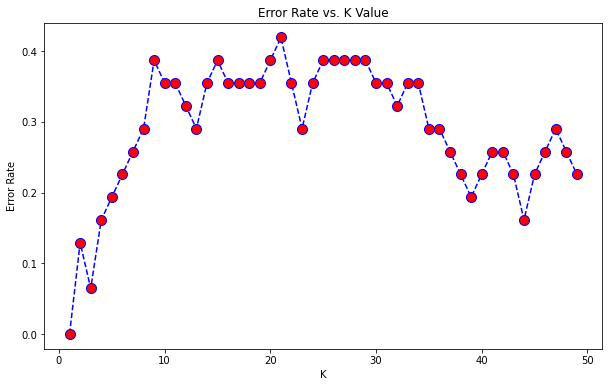

In [29]:
error_rate = []
for i in range(1, 50):
    pipeline = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors = i))
    pipeline.fit(X_train, y_train)
    predictions = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print(f"Accuracy at k = {i} is {accuracy}")
    error_rate.append(np.mean(predictions != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

Accuracy on Test Data: 100.0%


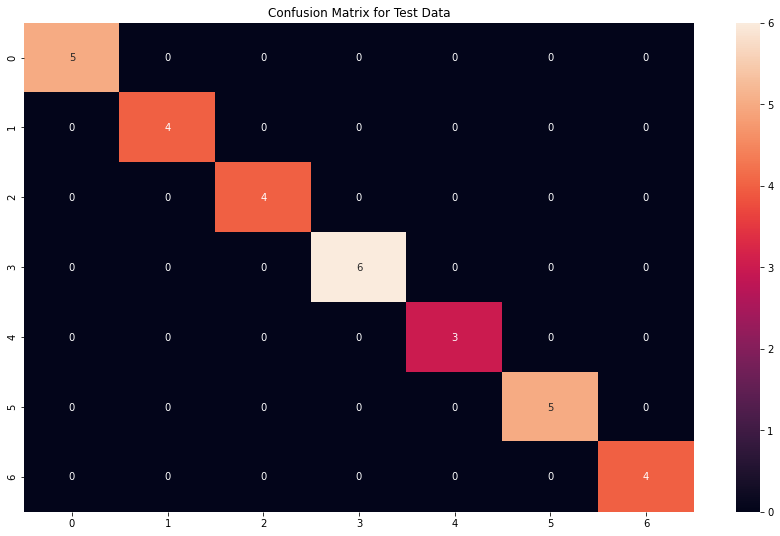


Accuracy on Whole Data: 100.0%


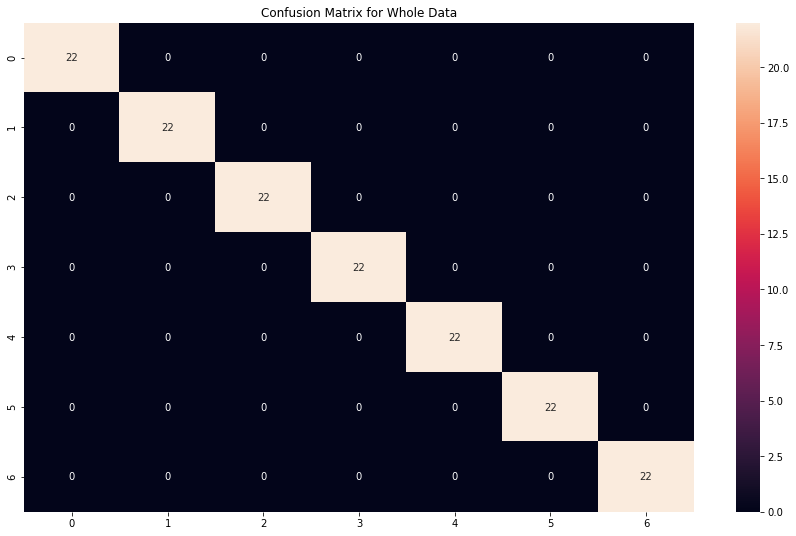

In [30]:
rf_pipeline = make_pipeline(StandardScaler(), RandomForestClassifier(random_state = 18))
rf_pipeline.fit(X_train, y_train)

# Accuray On Test Data
predictions = rf_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy on Test Data: {accuracy*100}%")
plt.figure(figsize = (15,9))
sns.heatmap(confusion_matrix(y_test, predictions), annot = True)
plt.title("Confusion Matrix for Test Data")
plt.show()
print()
predictions = rf_pipeline.predict(X.values)
accuracy = accuracy_score(y, predictions)
print(f"Accuracy on Whole Data: {accuracy*100}%")
plt.figure(figsize = (15,9))
sns.heatmap(confusion_matrix(y, predictions), annot = True)
plt.title("Confusion Matrix for Whole Data")
plt.show()


Accuracy on Test Data: 100.0%


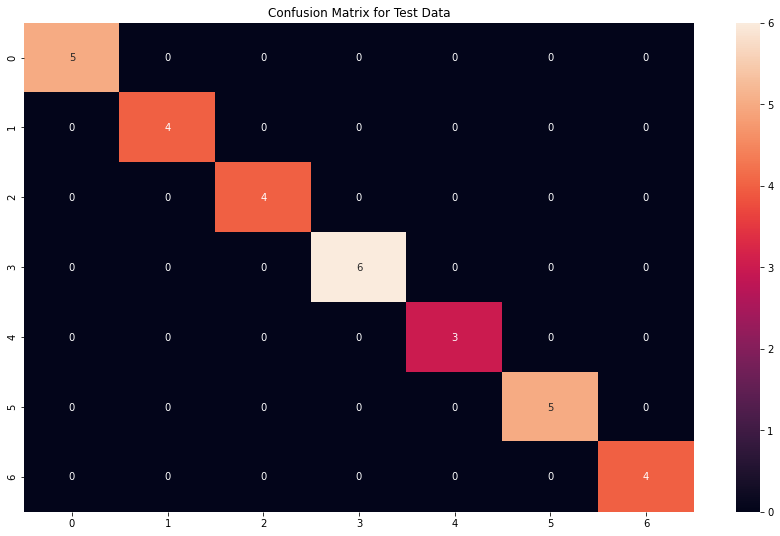


Accuracy on Whole Data: 100.0%


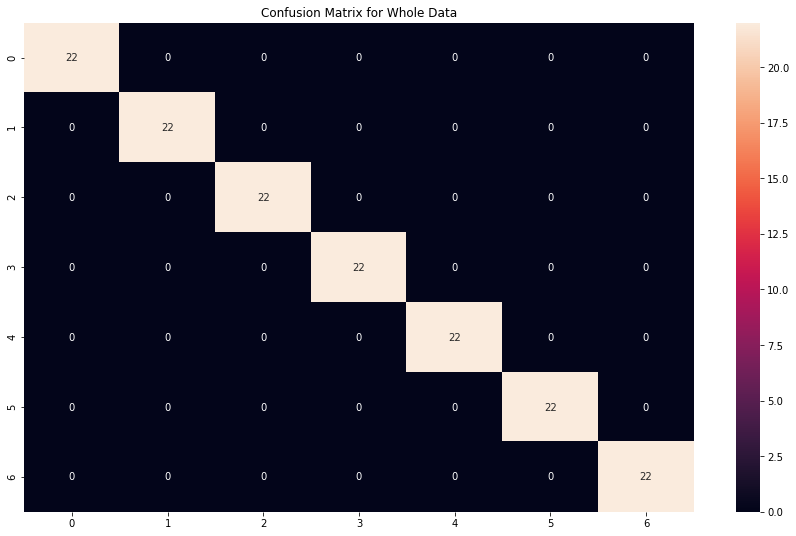

In [31]:
xgb_pipeline = make_pipeline(StandardScaler(), XGBClassifier(random_state = 18))
xgb_pipeline.fit(X_train, y_train)

# Accuray On Test Data
predictions = xgb_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy on Test Data: {accuracy*100}%")
plt.figure(figsize = (15,9))
sns.heatmap(confusion_matrix(y_test, predictions), annot = True)
plt.title("Confusion Matrix for Test Data")
plt.show()
print()
predictions = xgb_pipeline.predict(X.values)
accuracy = accuracy_score(y, predictions)
print(f"Accuracy on Whole Data: {accuracy*100}%")
plt.figure(figsize = (15,9))
sns.heatmap(confusion_matrix(y, predictions), annot = True)
plt.title("Confusion Matrix for Whole Data")
plt.show()

In [32]:
xgb_pipeline = make_pipeline(StandardScaler(), XGBClassifier(random_state = 18))
xgb_pipeline.fit(X_train, y_train)

# Accuray On Test Data
predictions = xgb_pipeline.predict([[33,64,62,2,1,13,0,38]])
#accuracy = accuracy_score(y_test, predictions)
#print(f"Accuracy on Test Data: {accuracy*100}%")
print(predictions)

[5]


In [33]:
print(X_test)

[[30 60 63  3  1  9  9 29]
 [29 58 61  2  1 11  0 38]
 [29 59 49  3  4 12  0 39]
 [29 57 47  3  2  6 18 15]
 [33 64 39  1  6 13  0 10]
 [33 64 50  2 10 41  0  0]
 [35 67 42  4  0 10  0 35]
 [33 63 42  1  6  7 18 20]
 [34 65 54  2 10 38  0  0]
 [33 64 29  0  6  8  7 30]
 [29 59 42  4  4  9  0 10]
 [35 67 28  1  7  8  7 31]
 [32 63 51  1  8 11 13 12]
 [31 62 63  3  1 11 12 15]
 [32 62 45  1  4  5 18 19]
 [27 54 30  1  7 13  0 13]
 [36 68 38  4  0  7  9 30]
 [27 55 59  2  4 11 12 15]
 [31 62 32  3  9 39  0  0]
 [25 50 48  2  5 11 11 14]
 [36 60 43  4  4 15  0 41]
 [30 60 42  4  4 21  0 18]
 [33 63 32  0  5 13  0 13]
 [30 60 42  4  3 21  0 20]
 [37 70 37  1  6 12  0 41]
 [35 66 47  1  8  9 18 19]
 [26 52 59  2  8 11  0  9]
 [30 60 49  2 10 13  0  9]
 [25 50 32  1  7 24  0 19]
 [26 52 36  1  7  7 16 20]
 [33 64 34  1  7 38  0  0]]


In [34]:
X_test

array([[30, 60, 63,  3,  1,  9,  9, 29],
       [29, 58, 61,  2,  1, 11,  0, 38],
       [29, 59, 49,  3,  4, 12,  0, 39],
       [29, 57, 47,  3,  2,  6, 18, 15],
       [33, 64, 39,  1,  6, 13,  0, 10],
       [33, 64, 50,  2, 10, 41,  0,  0],
       [35, 67, 42,  4,  0, 10,  0, 35],
       [33, 63, 42,  1,  6,  7, 18, 20],
       [34, 65, 54,  2, 10, 38,  0,  0],
       [33, 64, 29,  0,  6,  8,  7, 30],
       [29, 59, 42,  4,  4,  9,  0, 10],
       [35, 67, 28,  1,  7,  8,  7, 31],
       [32, 63, 51,  1,  8, 11, 13, 12],
       [31, 62, 63,  3,  1, 11, 12, 15],
       [32, 62, 45,  1,  4,  5, 18, 19],
       [27, 54, 30,  1,  7, 13,  0, 13],
       [36, 68, 38,  4,  0,  7,  9, 30],
       [27, 55, 59,  2,  4, 11, 12, 15],
       [31, 62, 32,  3,  9, 39,  0,  0],
       [25, 50, 48,  2,  5, 11, 11, 14],
       [36, 60, 43,  4,  4, 15,  0, 41],
       [30, 60, 42,  4,  4, 21,  0, 18],
       [33, 63, 32,  0,  5, 13,  0, 13],
       [30, 60, 42,  4,  3, 21,  0, 20],
       [37, 70, 

In [35]:
data.columns

Index(['Temparature', 'Humidity ', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name'],
      dtype='object')

In [1]:

user_input= xgb_pipeline.predict([[26,52,38,4,3,37,0,0]])
print(fertname_dict[user_input[0]])

NameError: name 'xgb_pipeline' is not defined

In [37]:
import pickle

In [38]:
pickle.dump(xgb_pipeline, open("xgb.pkl", "wb"))
print("Saved All Models")

Saved All Models


In [12]:
import pickle  
lr=pickle.load(open('xgb.pkl','rb'))

In [17]:
user_input= lr.predict([[29, 52, 45, 2, 8, 12, 0, 36]])
print(user_input[0])

5
